In [22]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

### FUNCTION INITIALISATION
def f2(x):
    return x[0]**2 + 4.0 * x[1]**2 + 0.001 * x[0] * x[1] - x[1]    
def f(x):
    return 100.0*(x[1]-x[0]**3)**2 + (1 - x[0])**2

f_type = 'nonquadratic'
if (f_type == 'quadratic'):
    A = np.array([[2, 0.001], [0.001, 8]], dtype = float)
    b = np.array([0, -1], dtype = float)

### INITIAL POINT
x0 = np.array([10,10], dtype = float)
    
### SETTINGS
eps = 10**(-2)
h = np.array([0.01,0.01], dtype = float)
x0 = np.array([0,0.125], dtype = float)

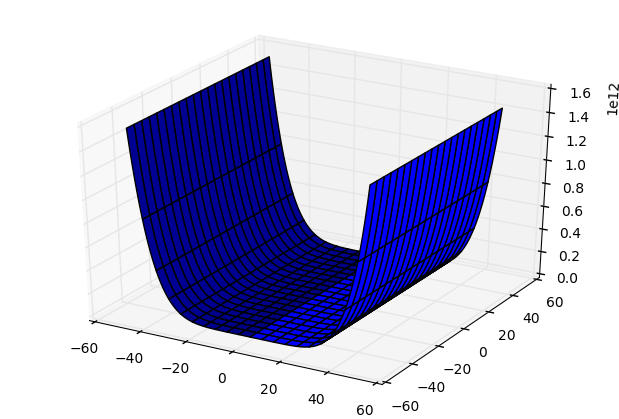

In [20]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy

def makeData ():
    x = numpy.arange (-50, 50, 0.5)
    y = numpy.arange (-50, 50, 0.5)
    xgrid, ygrid = numpy.meshgrid(x, y)

    zgrid = f([xgrid, ygrid])
    return xgrid, ygrid, zgrid

x, y, z = makeData()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z)

pylab.show()

# GRADIENT METHOD

Gradient method found approximate solution in 10 iterations
The initial point is (0.0, 0.125)
The approximate solution of the problem is ( 0.9583706,  0.8702345)
The value of function in this point is  0.0117413


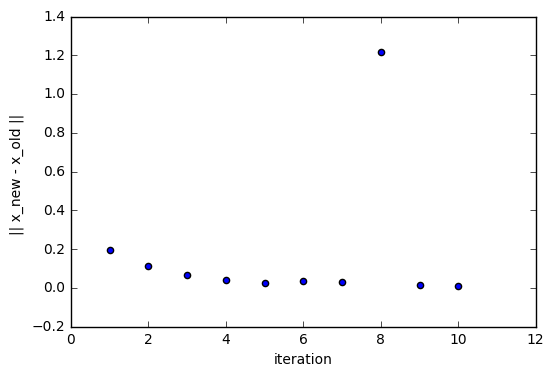

In [21]:
### APPROXIMATE GRADIENT
def df1(x,h1):
    return (f([x[0] + h1, x[1]]) - f([x[0] - h1, x[1]])) / (2 * h1)

def df2(x,h2):
    return (f([x[0], x[1] + h2]) - f([x[0], x[1] - h2])) / (2 * h2)


def df(x,h):
    return np.array([df1(x,h[0]), df2(x,h[1])])

### TRUE GRADIENT (ONLY FOR QUADRATIC FUNCTIONS)
def truedf(x):           
    return A.dot(x)+b

### METHODS OF CHOOSING ALPHA
def choose_alpha_method(x,h,f_type='none'):
    if (f_type == 'quadratic'):
        return alpha_quadr(x,h)
    else:
        return alpha_split(x,h)

def alpha_quadr(x,h): 
    return -np.dot((A.dot(x)+b),h)/np.dot(A.dot(h),h)

def alpha_split(x,h,b=1,l=0.5):
    alpha = b
    q = 0.1
    while (f(x+alpha*h)-f(x)>=0):
    #while (f(x+alpha*h)-f(x)>q*alpha*df(x).dot(h)):
        alpha *= l
    return alpha

### STOP CONDITIONS
def stop1(x1,x2,k):
    plt.ylabel('|| x_new - x_old || ')
    d = norm(x2-x1, ord=2)
    plt.scatter(k, d)
    return d<=eps

def stop2(x1,x2,k):
    plt.ylabel('| f(x_new) - f(x_old) | ')
    d = abs(f(x2)-f(x1))
    plt.scatter(k, d)
    return d<=eps

def stop3(x,h,k):
    plt.ylabel('|| f\'(x_new) || ')
    d = norm(df(x,h), ord=2)
    plt.scatter(k, d)
    return d<=eps

### ACTUALLY THE GRADIENT METHOD
def gradient_method(x0,h):
    fout = open('output.txt', 'w')
    fout.write('The initial point is ({x}, {y})\n\n'.format(x=x0[0], y=x0[1]))
    x_new = x0
    k = 0
    plt.xlabel('iteration')
    while (k<300):
        x_old = x_new    
        step = - df(x_old,h)
        alpha = choose_alpha_method(x_old,step,f_type)
        x_new = x_old + alpha * step
        k += 1 
        fout.write('{iter:>3}. alpha = {al:<17.15f},   x_{iter:<3} = ({x:>18.15f}, {y:>18.15f})\n'.format(iter=k, x=x_new[0], y=x_new[1], al=alpha))
        #print('{iter:>3}. alpha = {al:<17.15f},   x_{iter:<3} = ({x:>18.15f}, {y:>18.15f})'.format(iter=k, x=x_new[0], y=x_new[1], al=alpha))
        if (stop1(x_old,x_new,k)):    ### STOP CONDITION 1
        #if (stop2(x_old,x_new,k)):    ### STOP CONDITION 2
        #if (stop3(x_new,h,k)):        ### STOP CONDITION 3
            break
    print('Gradient method found approximate solution in {} iterations'.format(k))
    fout.write('\nThe approximate solution of the problem is ({x:>10.7f}, {y:>10.7f})\n'.format(x=x_new[0], y=x_new[1]))
    fout.write('The value of function in this point is {v:>10.7f}\n'.format(v=f(x_new)))
    fout.close()
    return x_new

### PROGRAM    
minim = gradient_method(x0,h)
print('The initial point is ({x}, {y})'.format(x=x0[0], y=x0[1]))
print('The approximate solution of the problem is ({x:>10.7f}, {y:>10.7f})'.format(x=minim[0], y=minim[1]))
print('The value of function in this point is {v:>10.7f}'.format(v=f(minim)))
plt.show()

#trueminim = np.array([-1000.0/15999999, 2000000.0/15999999])
#print('The true solution of the problem is ({x:>10.7f}, {y:>10.7f})'.format(x=trueminim[0], y=trueminim[1]))
#print('The value of function in this point is {v:>10.7f}'.format(v=f(trueminim)))
print()